# SRAG - Agrupamento e Detecção de Anomalias

Este é um trabalho realizado para a disciplina de Sistemas de Apoio à Decisão do curso de Sistemas de Informação da Universidade Federal de Ouro Preto.

A base de dados disponibilizada pelo governo diz respeito a Casos de Síndrome Respiratória Aguda Grave Hospitalizados. Para este trabalho iremos trabalhar com uma amostragem de 1000 registros aleatórios. 

<center><img src="img/srag.jpg"></center>

A SRAG é um agravamento de infecções respiratórias. Os sintomas geralmente são febre de início súbito, mesmo que referida, acompanhada de tosse ou dor de garganta e pelo menos um dos sintomas: mialgia, cefaleia ou artralgia.

A evolução para Síndrome Respiratória Aguda acontece quando o paciente apresenta os sintomas acima e mais algum dos sintomas abaixo:

• Dispneia;

• Desconforto respiratório;

• Insuficiência respiratória;

• Saturação de oxigênio menor que 95%;

• Exacerbação de doença preexistente.

## 1.0. Importar Dados

In [119]:
# Bilioteca para análise e manipulação de dados
import pandas as pd

In [203]:
# Lendo o arquivo de amostra da base de dados
df = pd.read_csv('data/sample_SRAG.csv')
df.head()

,DT_NOTIFIC,SEM_NOT,DT_SIN_PRI,SEM_PRI,SG_UF_NOT,ID_REGIONA,CO_REGIONA,ID_MUNICIP,CO_MUN_NOT,ID_UNIDADE,...,DS_AN_OUT,TP_AM_SOR,SOR_OUT,DT_CO_SOR,TP_SOR,OUT_SOR,DT_RES,RES_IGG,RES_IGM,RES_IGA
0,19/07/2020,30,14/07/2020,29,MG,BELO HORIZONTE,1449.0,CONTAGEM,311860,UNIDADE PRONTO ATENDIMENTO CONTAGEM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,03/08/2020,32,03/08/2020,32,MG,PASSOS,1455.0,MONTE SANTO DE MINAS,314320,SANTA CASA DE MISERICORDIA DE MONTE SANTO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,05/06/2020,23,02/06/2020,23,PA,01 REGIONAL DE PROTECAO SOCIAL,1484.0,BELEM,150140,UPA DAGUA I,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10/06/2020,24,07/06/2020,24,SP,GVE XII ARARAQUARA,1337.0,IBITINGA,351960,CENTRO DE SAUDE II IBITINGA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,18/06/2020,25,13/06/2020,24,PA,04 REGIONAL DE PROTECAO SOCIAL,1487.0,CAPANEMA,150220,ASSOCIACAO GUIOMAR JESUS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
# Dimensões do dataframe
# 1000 linhas e 154 colunas
df.shape

(1000, 154)

## 2.0. Seleção das Features

Selecionar as variáveis que serão necessárias para aplicar os modelos de clusterização e detecção de anomalias.

### 2.1. Exclusão de Variáveis

In [204]:
# Deletar colunas irrelevantes para o trabalho
df = df.drop(['RES_IGA', 'RES_IGM', 'RES_IGG', 'DT_RES', 'OUT_SOR', 'TP_SOR', 'DT_CO_SOR', 'SOR_OUT',
             'TP_AM_SOR', 'DS_AN_OUT', 'AN_OUTRO', 'AN_ADENO', 'AN_PARA3', 'AN_PARA2', 'AN_PARA1',
             'AN_VSR', 'AN_SARS2', 'POS_AN_OUT', 'TP_FLU_AN', 'POS_AN_FLU', 'RES_AN', 'DT_RES_AN',
             'TP_TES_AN', 'DT_TOMO', 'TOMO_OUT', 'TOMO_RES', 'OBES_IMC', 'MORB_DESC', 'M_AMAMENTA',
             'HISTO_VGM', 'PAIS_VGM', 'CO_PS_VGM', 'LO_PS_VGM', 'DT_VGM', 'DT_RT_VGM', 'PCR_SARS2', 
             'PAC_COCBO', 'PAC_DSCBO', 'OUT_ANIM', 'PCR_RINO', 'PCR_OUTRO', 'DS_PCR_OUT', 'CLASSI_OUT',
             'PCR_PARA4', 'PCR_ADENO', 'PCR_METAP', 'PCR_BOCA', 'PCR_VSR', 'PCR_PARA1', 'PCR_PARA2', 
              'PCR_PARA3', 'FLUASU_OUT', 'PCR_FLUBLI', 'FLUBLI_OUT', 'POS_PCROUT', 'POS_PCRFLU', 'TP_FLU_PCR',
              'PCR_FLUASU', 'OUT_AMOST', 'DT_EVOLUCA', 'DT_ENCERRA', 'DT_DIGITA', 'DT_PCR', 'DT_COLETA',
             'DT_RAIOX', 'RAIOX_OUT', 'DT_NOTIFIC', 'DT_ENTUTI', 'DT_SAIDUTI', 'ID_UNIDADE', 'ID_REGIONA',
             'DT_SIN_PRI', 'ID_MUNICIP', 'DT_NASC', 'DT_INTERNA', 'DT_VAC_MAE', 'DT_NASC', 'AMOSTRA', 'TP_AMOSTRA', 
             'CO_REGIONA', 'CO_MUN_NOT', 'CO_UNI_NOT', 'DT_UT_DOSE', 'DT_DOSEUNI', 'DT_1_DOSE', 'DT_2_DOSE',
             'CS_ETINIA', 'ID_PAIS', 'CO_PAIS', 'CS_ESCOL_N', 'MAE_VAC', 'OUTRO_DES', 'SG_UF_NOT', 'ID_RG_RESI',
             'CO_RG_RESI', 'CO_MUN_RES', 'CS_ZONA', 'DT_ANTIVIR', 'TP_AMOSTRA', 'SUPORT_VEN',
             'ID_RG_INTE', 'CO_RG_INTE', 'CO_MU_INTE', 'OUT_ANTIV', 'SEM_NOT', 'TP_ANTIVIR', 
              'TP_IDADE', 'CS_GESTANT', 'COD_IDADE', 'PCR_RESUL', 'PCR_RESUL', 'CRITERIO', 
              'CS_SEXO'], axis=1)
df.head()

,SEM_PRI,NU_IDADE_N,CS_RACA,SG_UF,ID_MN_RESI,SURTO_SG,NOSOCOMIAL,AVE_SUINO,FEBRE,TOSSE,...,SG_UF_INTE,ID_MN_INTE,UTI,RAIOX_RES,CLASSI_FIN,EVOLUCAO,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA
0,29,76,9.0,MG,BETIM,2.0,2.0,2.0,2.0,1.0,...,MG,CONTAGEM,NaN,NaN,5.0,NaN,2.0,2.0,2.0,2.0
1,32,86,4.0,MG,MONTE SANTO DE MINAS,2.0,2.0,2.0,1.0,2.0,...,MG,MONTE SANTO DE MINAS,2.0,NaN,4.0,2.0,2.0,2.0,2.0,2.0
2,23,95,4.0,PA,BELEM,1.0,NaN,NaN,2.0,2.0,...,PA,BELEM,2.0,4.0,5.0,2.0,NaN,NaN,NaN,NaN
3,24,54,1.0,SP,IBITINGA,2.0,2.0,2.0,2.0,1.0,...,SP,IBITINGA,2.0,2.0,4.0,1.0,NaN,NaN,NaN,NaN
4,24,37,NaN,PA,BELEM,2.0,2.0,2.0,1.0,1.0,...,PA,CAPANEMA,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN


### 2.2. Dicionário de Variáveis

De acordo com a fonte dos dados, essa é a descrição de cada uma das variáveis presentes no dataset.

- NU_IDADE_N - Idade do Paciente
- SG_UF - UF da residência do Paciente
- SURTO_SG - Se o caso é proveniente de SG
- NOSOCOMIAL - Caso de SRAG com infecção adquirida após internação.
- AVE_SUINO - Caso com contato direto com aves ou suínos.
- FEBRE - Se o Paciente apresentou febre
- TOSSE - Se o Paciente apresentou tosse
- GARGANTA - Se o Paciente apresentou dor de garganta
- DISPNEIA - Se o Paciente apresentou dispneia
- DESC_RESP - Se o Paciente apresentou desconforto respiratório
- SATURACAO - Se o Paciente apresentou saturação O2 < 95%
- DIARREIA - Se o Paciente apresentou diarreia
- VOMITO - Se o Paciente apresentou vômito
- DOR_ABD - Se o Paciente apresentou dor abdominal
- FADIGA - Se o Paciente apresentou fadiga
- PERD_OLFT - Se o Paciente apresentou perda de olfato
- PERD_PALA - Se o Paciente apresentou perda de paladar
- OUTRO_SIN - Se o Paciente apresentou outros sintomas
- PUERPERA - Se o Paciente era puérpera ou parturiente (mulher que pariu recentemente – até 45 dias do parto)
- FATOR_RISC - Se o Paciente apresentou algum fator de risco
- CARDIOPATI - Se o Paciente possuia Doença Cardiovascular Crônica
- HEMATOLOGI - Se o Paciente possuia Doença Hematológica Crônica
- SIND_DOWN - Se o Paciente possuia Síndrome de Down
- HEPATICA - Se o Paciente possuia Doença Hepática Crônica
- ASMA - Se o Paciente possuia asma
- DIABETES - Se o Paciente possuia diabetes
- NEUROLOGIC - Se o Paciente possuia Doença Neurológica
- PNEUMOPATI - Paciente possui outra pneumopatia crônica
- IMUNODEPRE - Se o Paciente possuia Imunodeficiência ou Imunodepressão (diminuição da função do sistema imunológico)
- RENAL - Se o Paciente possuia Doença Renal Crônica
- OBESIDADE - Se o Paciente possuia obesidade
- OUT_MORBI - Se o Paciente possuia outro fator de risco
- VACINA - Se o Paciente foi vacinado contra a gripe na última campanha
- ANTIVIRAL - Se o Paciente usou antiviral para a gripe
- HOSPITAL - Se o Paciente foi internado
- SG_UF_INTE - UF de internação do paciente
- UTI - Se o Paciente foi internado na UTI
- RAIOX_RES - Resultado do Raio X de tórax
- CLASSI_FIN - Diagnóstico final do caso.
- EVOLUCAO - Evolução do caso 
- ID_MN_RESI - Município de residência do paciente
- ID_MN_INTE - Município de internação do paciente
- SEM_PRI - Semana Epidemiológica dos primeiros sintomas do paciente.
- CS_RACA - Raça do paciente

In [4]:
# Colunas presentes no dataset
df.columns

Index(['SEM_PRI', 'NU_IDADE_N', 'CS_RACA', 'SG_UF', 'ID_MN_RESI', 'SURTO_SG',
       'NOSOCOMIAL', 'AVE_SUINO', 'FEBRE', 'TOSSE', 'GARGANTA', 'DISPNEIA',
       'DESC_RESP', 'SATURACAO', 'DIARREIA', 'VOMITO', 'OUTRO_SIN', 'PUERPERA',
       'FATOR_RISC', 'CARDIOPATI', 'HEMATOLOGI', 'SIND_DOWN', 'HEPATICA',
       'ASMA', 'DIABETES', 'NEUROLOGIC', 'PNEUMOPATI', 'IMUNODEPRE', 'RENAL',
       'OBESIDADE', 'OUT_MORBI', 'VACINA', 'ANTIVIRAL', 'HOSPITAL',
       'SG_UF_INTE', 'ID_MN_INTE', 'UTI', 'RAIOX_RES', 'CLASSI_FIN',
       'EVOLUCAO', 'DOR_ABD', 'FADIGA', 'PERD_OLFT', 'PERD_PALA'],
      dtype='object')

## 3.0. Preparação dos Dados

Esta base de dados possui muitos valores faltantes, e os dados precisam ser normalizados.

### 3.1. Preenchimento de valores faltantes

In [5]:
# Contando valores NaN em todas as colunas do dataset
# Apenas as colunas CS_SEXO, NU_IDADE_N, FATOR_RISC e SG_UF_INTE não possuem valores faltantes
df.isnull().sum()

SEM_PRI         0
NU_IDADE_N      0
CS_RACA        86
SG_UF           0
ID_MN_RESI      0
SURTO_SG      163
NOSOCOMIAL    209
AVE_SUINO     187
FEBRE         118
TOSSE          87
GARGANTA      242
DISPNEIA      101
DESC_RESP     155
SATURACAO     145
DIARREIA      252
VOMITO        258
OUTRO_SIN     252
PUERPERA      610
FATOR_RISC      0
CARDIOPATI    500
HEMATOLOGI    606
SIND_DOWN     610
HEPATICA      609
ASMA          600
DIABETES      529
NEUROLOGIC    594
PNEUMOPATI    592
IMUNODEPRE    606
RENAL         595
OBESIDADE     595
OUT_MORBI     530
VACINA        209
ANTIVIRAL     132
HOSPITAL       37
SG_UF_INTE      0
ID_MN_INTE     81
UTI           156
RAIOX_RES     307
CLASSI_FIN    124
EVOLUCAO      228
DOR_ABD       722
FADIGA        720
PERD_OLFT     721
PERD_PALA     721
dtype: int64

In [205]:
# Como as colunas deste dataset representam valores categóricas, a medida de centralidade Moda será usada para
# preencher os valores faltantes
# Por fim é verificado se ainda há NaN's

# O cálculo da Moda é feito com a biblioteca statistics
import statistics as sts

df['CS_RACA'].fillna(sts.mode(df['CS_RACA']), inplace=True)

df['SURTO_SG'].fillna(sts.mode(df['SURTO_SG']), inplace=True)

df['NOSOCOMIAL'].fillna(sts.mode(df['NOSOCOMIAL']), inplace=True)

df['AVE_SUINO'].fillna(sts.mode(df['AVE_SUINO']), inplace=True)

df['FEBRE'].fillna(sts.mode(df['FEBRE']), inplace=True)

df['TOSSE'].fillna(sts.mode(df['TOSSE']), inplace=True)

df['GARGANTA'].fillna(sts.mode(df['GARGANTA']), inplace=True)

df['DISPNEIA'].fillna(sts.mode(df['DISPNEIA']), inplace=True)

df['DESC_RESP'].fillna(sts.mode(df['DESC_RESP']), inplace=True)

df['SATURACAO'].fillna(sts.mode(df['SATURACAO']), inplace=True)

df['DIARREIA'].fillna(sts.mode(df['DIARREIA']), inplace=True)

df['VOMITO'].fillna(sts.mode(df['VOMITO']), inplace=True)

df['OUTRO_SIN'].fillna(sts.mode(df['OUTRO_SIN']), inplace=True)

df['PUERPERA'].fillna(sts.mode(df['PUERPERA']), inplace=True)

df['CARDIOPATI'].fillna(sts.mode(df['CARDIOPATI']), inplace=True)

df['HEMATOLOGI'].fillna(sts.mode(df['HEMATOLOGI']), inplace=True)

df['SIND_DOWN'].fillna(sts.mode(df['SIND_DOWN']), inplace=True)

df['HEPATICA'].fillna(sts.mode(df['HEPATICA']), inplace=True)

df['ASMA'].fillna(sts.mode(df['ASMA']), inplace=True)

df['DIABETES'].fillna(sts.mode(df['DIABETES']), inplace=True)

df['NEUROLOGIC'].fillna(sts.mode(df['NEUROLOGIC']), inplace=True)

df['PNEUMOPATI'].fillna(sts.mode(df['PNEUMOPATI']), inplace=True)

df['IMUNODEPRE'].fillna(sts.mode(df['IMUNODEPRE']), inplace=True)

df['RENAL'].fillna(sts.mode(df['RENAL']), inplace=True)

df['OBESIDADE'].fillna(sts.mode(df['OBESIDADE']), inplace=True)

df['OUT_MORBI'].fillna(sts.mode(df['OUT_MORBI']), inplace=True)

df['VACINA'].fillna(sts.mode(df['VACINA']), inplace=True)

df['ANTIVIRAL'].fillna(sts.mode(df['ANTIVIRAL']), inplace=True)

df['HOSPITAL'].fillna(sts.mode(df['HOSPITAL']), inplace=True)

df['UTI'].fillna(sts.mode(df['UTI']), inplace=True)

df['RAIOX_RES'].fillna(sts.mode(df['RAIOX_RES']), inplace=True)

df['CLASSI_FIN'].fillna(sts.mode(df['CLASSI_FIN']), inplace=True)

df['EVOLUCAO'].fillna(sts.mode(df['EVOLUCAO']), inplace=True)

df['DOR_ABD'].fillna(sts.mode(df['DOR_ABD']), inplace=True)

df['FADIGA'].fillna(sts.mode(df['FADIGA']), inplace=True)

df['PERD_OLFT'].fillna(sts.mode(df['PERD_OLFT']), inplace=True)

df['PERD_PALA'].fillna(sts.mode(df['PERD_PALA']), inplace=True)

df['ID_MN_INTE'].fillna(sts.mode(df['ID_MN_INTE']), inplace=True)

df.isnull().sum()

SEM_PRI       0
NU_IDADE_N    0
CS_RACA       0
SG_UF         0
ID_MN_RESI    0
SURTO_SG      0
NOSOCOMIAL    0
AVE_SUINO     0
FEBRE         0
TOSSE         0
GARGANTA      0
DISPNEIA      0
DESC_RESP     0
SATURACAO     0
DIARREIA      0
VOMITO        0
OUTRO_SIN     0
PUERPERA      0
FATOR_RISC    0
CARDIOPATI    0
HEMATOLOGI    0
SIND_DOWN     0
HEPATICA      0
ASMA          0
DIABETES      0
NEUROLOGIC    0
PNEUMOPATI    0
IMUNODEPRE    0
RENAL         0
OBESIDADE     0
OUT_MORBI     0
VACINA        0
ANTIVIRAL     0
HOSPITAL      0
SG_UF_INTE    0
ID_MN_INTE    0
UTI           0
RAIOX_RES     0
CLASSI_FIN    0
EVOLUCAO      0
DOR_ABD       0
FADIGA        0
PERD_OLFT     0
PERD_PALA     0
dtype: int64

### 3.2. Criação de Datasets

Criação de datasets para realizar a clusterização e detectar anomalias.

### 3.2.1. Dataset para Estados

Criação de um dataset com o número de ocorrências casos e internações em cada estado.

In [8]:
# Nuúmero de casos
df['SG_UF'].value_counts()

SP    318
MG     85
RJ     83
PE     68
PR     59
CE     46
RS     32
PA     29
BA     26
GO     26
PB     25
DF     25
AM     23
MT     23
MS     18
SC     17
MA     15
AL     15
ES     13
PI     13
RN     12
SE      9
RO      6
TO      6
RR      3
AC      3
AP      2
Name: SG_UF, dtype: int64

In [9]:
# Número de internações
df['SG_UF_INTE'].value_counts()

SP    320
MG     86
RJ     80
PE     67
PR     59
CE     46
RS     32
DF     32
PA     29
BA     27
PB     25
MT     23
AM     21
GO     19
MS     18
SC     17
AL     16
MA     15
ES     13
PI     13
RN     11
SE      9
RO      7
TO      6
AC      4
RR      3
AP      2
Name: SG_UF_INTE, dtype: int64

A fim de identificá-los posteriormente os estados possuirão os seguintes índices:

SP - 0, MG - 1, RJ - 2, ES - 3, RS - 4, SC - 5, PR - 6, MT - 7, MS - 8, GO - 9, DF - 10, TO - 11, RO - 12,
BA - 13, SE - 14, AL - 15, PE - 16, PB - 17, RN - 18, CE - 19, PI - 20, MA - 21, PA - 22, AP - 23, RR - 24,
AM - 25, AC - 26

In [194]:
# Dicionário com os números de ocorrências de casos e internações em cada estado
estados = {'ID': ['SP', 'MG', 'RJ', 'ES', 'RS', 'SC', 'PR', 'MT', 'MS', 'GO', 'DF', 'TO', 'RO', 'BA', 'SE', 'AL',
                 'PE', 'PB', 'RN', 'CE', 'PI', 'MA', 'PA', 'AP', 'RR', 'AM', 'AC'],
    'SG_UF': [318, 85, 83, 13, 32, 17, 59, 23, 18, 26, 25, 6, 6, 26, 9, 15, 68, 25, 12, 46, 13, 15, 29, 2, 3, 23, 3],
       'SG_UF_INTE': [320, 86, 80, 13, 32, 17, 59, 23, 18, 19, 32, 6, 7, 27, 9, 16, 67, 25,  11, 46, 13, 15, 29, 2, 3, 21, 4]}

# Criando um dataframe com o dicionário
df_estados = pd.DataFrame(estados)

# Salvando o dataframe como arquivo csv
df_estados.to_csv('data/estados.csv', index=False)

### 3.2.2. Dataset para Municípios

Criação de um dataset para municípios de residência dos pacientes, e outro para municípios de internação.

In [211]:
# Criando dataframes com o número de casos e número de internações em cada município
df_mn_res = pd.DataFrame(df['ID_MN_RESI'].value_counts())
df_mn_inte = pd.DataFrame(df['ID_MN_INTE'].value_counts())

# Salvando o dataframe como arquivo csv
df_mn_res.to_csv('data/mn_residencia.csv')
df_mn_inte.to_csv('data/mn_internacao.csv')

,ID_MN_RESI
SAO PAULO,127
RIO DE JANEIRO,38
RECIFE,33
FORTALEZA,22
SALVADOR,16
...,...
CAMPO MAIOR,1
GUAREI,1
CUSTODIA,1
IGARASSU,1


### 3.2.3. Dataset para Semana Epidemiológica

Criação de um dataset para semana epidemiológica dos primeiros sintomas dos pacientes.

In [238]:
# Criando dataframe com o número de casos em cada semana epidemiológica
df_sem_pri = pd.DataFrame(df.SEM_PRI.value_counts())

# Salvando o dataframe como arquivo csv
df_sem_pri.to_csv('data/semana_epidemiologica.csv')

### 3.2.4. Dataset para Diagnóstico Final

Criação de um dataset para a classificação final do caso do paciente.

In [247]:
# Criando dataframe com os números casos para cada classificação final do SRAG
df_classi_fin = pd.DataFrame(df.CLASSI_FIN.value_counts())

# Salvando o dataframe como arquivo csv
df_classi_fin.to_csv('data/classificacao_final.csv')

### 3.2.5. Dataset para Sintomas

Criação de um dataset para os sintomas do SRAG.

A fim de identificá-los posteriormente, os sintomas possuirão os seguintes índices:

Febre - 0, Tosse - 1, Garganta - 2, Dispneia - 3, Desconforto respiratório - 4, Saturação - 5, Diarréia - 6, Vômito - 7,
Dor abdominal - 8, Fadiga - 9, Perda de olfato - 10, Perda de paladar - 11, Outros Sintomas - 12

In [254]:
# Dicionário com os números de pacientes que tiveram cada sintoma
sintomas = {'Sintoma': ['Febre', 'Tosse', 'Garganta', 'Dispneia', 'Desc_Resp', 'Saturacao', 'Diarreia',
                       'Vomito', 'Dor_Abd', 'Fadiga', 'Perd_Olft', 'Perd_Pala', 'Outro_Sin']}
sintomas['Num_Ocorrencias'] = [
    len(df[df.FEBRE == 1]), len(df[df.TOSSE == 1]), len(df[df.GARGANTA == 1]), len(df[df.DISPNEIA == 1]), 
    len(df[df.DESC_RESP == 1]), len(df[df.SATURACAO == 1]), len(df[df.DIARREIA == 1]), len(df[df.VOMITO == 1]),
    len(df[df.DOR_ABD == 1]), len(df[df.FADIGA == 1]), len(df[df.PERD_OLFT == 1]), len(df[df.PERD_PALA == 1]),
    len(df[df.OUTRO_SIN == 1]),
]
# Criando um dataframe com o dicionário
df_sintomas = pd.DataFrame(sintomas)

# Salvando o dataframe como arquivo csv
df_sintomas.to_csv('data/sintomas.csv', index=False)

### 3.2.6. Dataset para Fatores de Risco

Criação de um dataset para os fatores de risco do paciente.

A fim de identificá-los posteriormente, os fatores de risco possuirão os seguintes índices:

Puérpera - 0, Doença Cardiovascular crônica - 1, Doença Hematológica crônica - 2, Síndrome de Down - 3, Doença Hepática
Crônica - 4, Asma - 5, Diabetes - 6, Doença Neurológica Crônica - 7, Pneumatopatia Crônica - 8, Imunodeficiência - 9, Doença Renal Crônica - 10,  Obesidade - 11, Outros - 12

In [261]:
# Dicionário com os números de pacientes que possuiam cada fator de risco
fatores = {'Fator': ['Puerpera', 'Cardiopati', 'Hematologi', 'Sind_Down', 'Hepatica', 'Asma', 'Diabetes',
                    'Neurologic', 'Pneumopati', 'Imunodepre', 'Renal', 'Obesidade', 'Outro']}
fatores['Num_Ocorrencias'] = [
    len(df[df.PUERPERA == 1]), len(df[df.CARDIOPATI == 1]), len(df[df.HEMATOLOGI == 1]), len(df[df.SIND_DOWN == 1]), 
    len(df[df.HEPATICA == 1]), len(df[df.ASMA == 1]), len(df[df.DIABETES == 1]), len(df[df.NEUROLOGIC == 1]),
    len(df[df.PNEUMOPATI == 1]), len(df[df.IMUNODEPRE == 1]), len(df[df.RENAL == 1]), len(df[df.OBESIDADE == 1]),
    len(df[df.OUT_MORBI == 1]),
]

# Criando um dataframe com o dicionário
df_fatores_risco = pd.DataFrame(fatores)

# Salvando o dataframe como arquivo csv
df_fatores_risco.to_csv('data/fator_risco.csv', index=False)

### 3.2.7. Dataset para Idades dos Pacientes

Criação de um dataset contendo as idades do pacientes.

In [131]:
# Criando um dataframe com as idades dos pacientes
df_idades = pd.DataFrame(df.NU_IDADE_N)

# Salvando o dataframe como arquivo csv
df_idades.to_csv('data/idades.csv', index=False)

### 3.2.8. Dataset para Raça dos Pacientes

Criação de um dataset contendo as raças do pacientes.

In [288]:
# Biblioteca para encontrar a Moda da coluna
import statistics as sts

# Substituindo o valor 9 (IGNORADO) pela moda da coluna
df.loc[df.CS_RACA == 9, 'CS_RACA'] = sts.mode(df['CS_RACA'])

# Criando um dataframe com a quantidades de pacientes de cada raça
df_racas = pd.DataFrame(df.CS_RACA.value_counts())

# Salvando o dataframe como arquivo csv
df_racas.to_csv('data/racas.csv')

### 3.3. Rotulação de Variáveis Categóricas

A coluna FATOR_RISC possue dados textuais, e os modelos de machine learning trabalham apenas com dados numéricos. Portanto, iremos transformar os dados dessa coluna em valores numéricos.

In [134]:
# Função para rotular a variável categórica
from sklearn.preprocessing import LabelEncoder

# Inseriu valores numéricos na coluna, 0 para não e 1 para sim
df['FATOR_RISC'] = LabelEncoder().fit_transform(df['FATOR_RISC'])

### 3.4. Alterando dados  e Exlcuindo Colunas Desnecessárias

Em várias colunas, foram inseridos o valor 9 para indicar que o campo foi ignorado no momento do preenchimento dos dados.
Iremos alterá-los para valores menores para eliminar a discepência e evitar problemas aos modelos.

In [135]:
# Alterando valores para eliminar a discrepância dos dados
df.loc[df.SURTO_SG == 9, 'SURTO_SG'] = 3
df.loc[df.NOSOCOMIAL == 9, 'NOSOCOMIAL'] = 3
df.loc[df.AVE_SUINO == 9, 'AVE_SUINO'] = 3
df.loc[df.FEBRE == 9, 'FEBRE'] = 3
df.loc[df.TOSSE == 9, 'TOSSE'] = 3
df.loc[df.GARGANTA == 9, 'GARGANTA'] = 3
df.loc[df.DISPNEIA == 9, 'DISPNEIA'] = 3
df.loc[df.DESC_RESP == 9, 'DESC_RESP'] = 3
df.loc[df.SATURACAO == 9, 'SATURACAO'] = 3
df.loc[df.DIARREIA == 9, 'DIARREIA'] = 3
df.loc[df.VOMITO == 9, 'VOMITO'] = 3
df.loc[df.OUTRO_SIN == 9, 'OUTRO_SIN'] = 3
df.loc[df.PUERPERA == 9, 'PUERPERA'] = 3
df.loc[df.CARDIOPATI == 9, 'CARDIOPATI'] = 3
df.loc[df.HEMATOLOGI == 9, 'HEMATOLOGI'] = 3
df.loc[df.SIND_DOWN == 9, 'SIND_DOWN'] = 3
df.loc[df.HEPATICA == 9, 'HEPATICA'] = 3
df.loc[df.ASMA == 9, 'ASMA'] = 3
df.loc[df.DIABETES == 9, 'DIABETES'] = 3
df.loc[df.NEUROLOGIC == 9, 'NEUROLOGIC'] = 3
df.loc[df.PNEUMOPATI == 9, 'PNEUMOPATI'] = 3
df.loc[df.IMUNODEPRE == 9, 'IMUNODEPRE'] = 3
df.loc[df.RENAL == 9, 'RENAL'] = 3
df.loc[df.OBESIDADE == 9, 'OBESIDADE'] = 3
df.loc[df.OUT_MORBI == 9, 'OUT_MORBI'] = 3
df.loc[df.VACINA == 9, 'VACINA'] = 3
df.loc[df.ANTIVIRAL == 9, 'ANTIVIRAL'] = 3
df.loc[df.HOSPITAL == 9, 'HOSPITAL'] = 3
df.loc[df.UTI == 9, 'UTI'] = 3
df.loc[df.FADIGA == 9, 'FADIGA'] = 3
df.loc[df.DOR_ABD == 9, 'DOR_ABD'] = 3
df.loc[df.PERD_OLFT == 9, 'PERD_OLFT'] = 3
df.loc[df.PERD_PALA == 9, 'PERD_PALA'] = 3
df.loc[df.RAIOX_RES == 9, 'RAIOX_RES'] = 7
df.loc[df.EVOLUCAO == 9, 'EVOLUCAO'] = 4

### Exclusão de Colunas 

Algumas colunas que estão no dataframe principal não serão necessárias posteriormente pois já estão em armazenados em arquivos csv. Portanto iremos excluí-las.

In [136]:
# Excluindo colunas
df = df.drop(['CS_RACA', 'CS_RACA', 'SG_UF', 'SG_UF_INTE', 'ID_MN_RESI', 'ID_MN_INTE', 'SEM_PRI'], axis=1)

### 3.4. Normalização

In [137]:
# Normalizando as colunas com a técnica MinMax
df = (df - df.min()) / (df.max() - df.min())

# Salvando o dataframe em arquivo csv
df.to_csv('data/pacientes.csv', index=False)

df.head()

,NU_IDADE_N,SURTO_SG,NOSOCOMIAL,AVE_SUINO,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,...,ANTIVIRAL,HOSPITAL,UTI,RAIOX_RES,CLASSI_FIN,EVOLUCAO,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA
0,0.76,0.5,0.5,0.5,0.5,0.0,0.5,0.5,0.5,0.0,...,0.0,0.0,0.5,0.833333,1.00,0.000000,0.5,0.5,0.5,0.5
1,0.86,0.5,0.5,0.5,0.0,0.5,0.5,0.0,0.0,0.0,...,0.5,0.0,0.5,0.833333,0.75,0.333333,0.5,0.5,0.5,0.5
2,0.95,0.0,0.5,0.5,0.5,0.5,0.5,0.0,0.0,0.0,...,0.5,0.0,0.5,0.500000,1.00,0.333333,0.5,0.5,0.5,0.5
3,0.54,0.5,0.5,0.5,0.5,0.0,0.0,0.0,0.0,0.5,...,0.5,0.0,0.5,0.166667,0.75,0.000000,0.5,0.5,0.5,0.5
4,0.37,0.5,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.5,0.0,0.5,0.166667,1.00,0.000000,0.5,0.5,0.5,0.5


## 4.0. Modelos de Machine Learning

Com todos os dados preparados, iremos construir um modelo de clusterização utilizando o algoritmo K-Means.

### 4.1. Clusterização

In [298]:
# Para manipular os vetores
import numpy as np

# Para plotar gráficos
import matplotlib.pyplot as plt

# Para usar o KMeans
from sklearn.cluster import KMeans

### 4.1.1. Grupos de pacientes

In [297]:
# Importando os dados
df_pacientes = pd.read_csv('data/pacientes.csv')

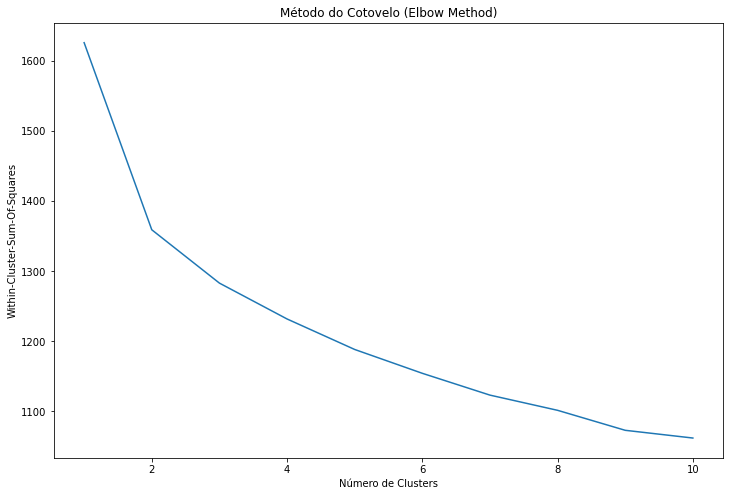

In [305]:
# Método do cotovelo (Elbow Method) para determinar o valor do K
# Segundo esta heurística, o melhor valor para K é 2
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init='k-means++', max_iter = 300, n_init = 10)
    kmeans.fit(df_pacientes)
    wcss.append(kmeans.inertia_)


plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss)
plt.title('Método do Cotovelo (Elbow Method)')
plt.xlabel('Número de Clusters')
plt.ylabel('Within-Cluster-Sum-Of-Squares')
plt.show()

In [306]:
# Agrupamento com KMeans utilizando 2 clusters
cluster = KMeans(n_clusters = 2, init='k-means++', max_iter = 300, n_init = 10)
grupos = cluster.fit_predict(df_pacientes)
grupos

array([0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,

In [307]:
# Contagem de registros por cluster
unicos, qnt = np.unique(grupos, return_counts = True)
print(f'Grupos: {unicos}')
print(f'Quantidades de pacientes em cada grupo: {qnt}')

Grupos: [0 1]
Quantidades de pacientes em cada grupo: [625 375]


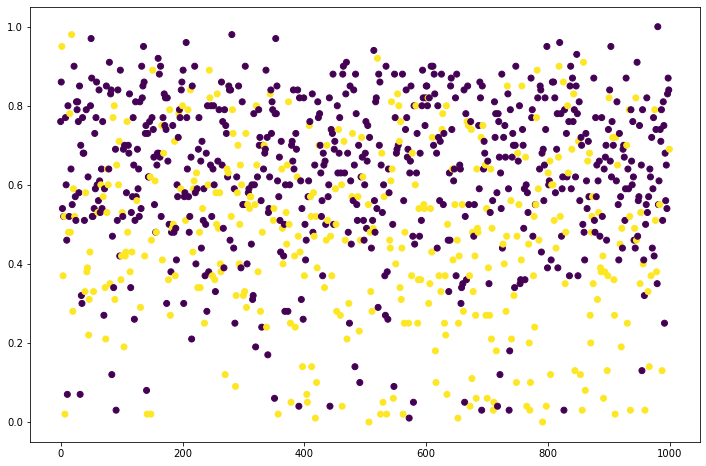

In [308]:
# Definir tamanho do gráfico
plt.figure(figsize=(12, 8))

# Plotar grágico de dispersão utilizando a variável de idade
plt.scatter(range(df_pacientes.shape[0]), df_pacientes.NU_IDADE_N, c=grupos)

In [309]:
# Criação de coluna de Grupos de pacientes
df_pacientes['Cluster_pacientes'] = grupos
df_pacientes.head(10)

,NU_IDADE_N,SURTO_SG,NOSOCOMIAL,AVE_SUINO,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,...,HOSPITAL,UTI,RAIOX_RES,CLASSI_FIN,EVOLUCAO,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA,Cluster_pacientes
0,0.76,0.5,0.5,0.5,0.5,0.0,0.5,0.5,0.5,0.0,...,0.0,0.5,0.833333,1.00,0.000000,0.5,0.5,0.5,0.5,0
1,0.86,0.5,0.5,0.5,0.0,0.5,0.5,0.0,0.0,0.0,...,0.0,0.5,0.833333,0.75,0.333333,0.5,0.5,0.5,0.5,0
2,0.95,0.0,0.5,0.5,0.5,0.5,0.5,0.0,0.0,0.0,...,0.0,0.5,0.500000,1.00,0.333333,0.5,0.5,0.5,0.5,1
3,0.54,0.5,0.5,0.5,0.5,0.0,0.0,0.0,0.0,0.5,...,0.0,0.5,0.166667,0.75,0.000000,0.5,0.5,0.5,0.5,0
4,0.37,0.5,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.5,0.166667,1.00,0.000000,0.5,0.5,0.5,0.5,1
5,0.52,0.0,0.5,0.5,0.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.5,0.166667,0.75,0.000000,0.5,0.5,0.5,0.5,0
6,0.52,0.5,0.0,0.5,0.0,0.5,0.5,0.0,0.0,0.0,...,0.0,0.0,0.833333,0.75,0.333333,0.5,0.5,0.5,0.5,1
7,0.02,0.5,0.5,0.5,0.0,0.0,0.5,0.0,0.5,0.5,...,0.0,0.5,0.833333,0.75,0.000000,0.5,0.5,0.5,0.5,1
8,0.77,0.0,0.5,0.5,0.0,0.0,0.5,0.0,0.0,0.0,...,0.0,0.0,0.166667,1.00,0.000000,0.5,0.5,0.5,0.5,0
9,0.60,0.5,0.5,0.5,0.0,0.0,0.5,0.0,0.0,0.0,...,0.0,0.5,0.833333,1.00,0.000000,0.5,0.5,0.5,0.5,0


In [31]:
# O erro do agrupamento
cluster.inertia_

1359.235533558519

**A principais características que diferenciam estes grupos de pacientes são a Idade e o Diagnóstico final do caso.**

### 4.1.2 Grupos de Estados

Agrupamento de estados utilizando as variáveis de número de casos e de internações.

In [195]:
# Importando os dados
df_estados = pd.read_csv('data/estados.csv')

# Transformando a coluna ID em index
df_estados.set_index('ID', inplace=True)

df_estados

,SG_UF,SG_UF_INTE
ID,,
SP,318,320
MG,85,86
RJ,83,80
ES,13,13
RS,32,32
SC,17,17
PR,59,59
MT,23,23
MS,18,18


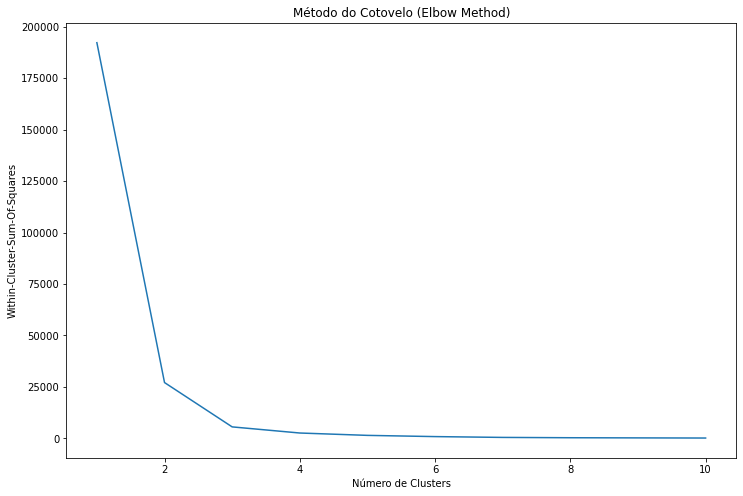

In [196]:
# Método do cotovelo (Elbow Method) para determinar o valor do K
# Segundo esta heurística, o melhor valor para K é 3
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, max_iter = 300, n_init = 10)
    kmeans.fit(df_estados)
    wcss.append(kmeans.inertia_)


plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss)
plt.title('Método do Cotovelo (Elbow Method)')
plt.xlabel('Número de Clusters')
plt.ylabel('Within-Cluster-Sum-Of-Squares')
plt.show()

In [197]:
# Agrupamento com KMeans utilizando 3 clusters
cluster = KMeans(n_clusters = 3, init='k-means++', n_init = 10)
grupos = cluster.fit_predict(df_estados)
grupos

array([0, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1])

In [198]:
# Contagem de registros por cluster
unicos, qnt = np.unique(grupos, return_counts = True)
print(f'Grupos: {unicos}')
print(f'Quantidades de pacientes em cada grupo: {qnt}')

Grupos: [0 1 2]
Quantidades de pacientes em cada grupo: [ 1 21  5]


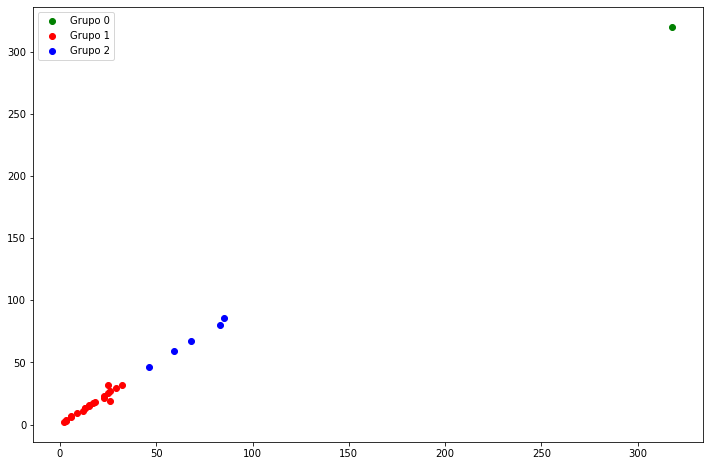

In [199]:
# Gráfico de dispersão para visualizar os clusters
x = df_estados.to_numpy()
plt.figure( figsize=(12, 8) )
plt.scatter(x[grupos == 0, 0], x[grupos == 0, 1], c='green', label='Grupo 0')
plt.scatter(x[grupos == 1, 0], x[grupos == 1, 1], c='red', label='Grupo 1')
plt.scatter(x[grupos == 2, 0], x[grupos == 2, 1], c='blue', label='Grupo 2')
plt.legend()

In [200]:
# Criação de uma coluna para grupos
df_estados['grupos'] = grupos
df_estados

,SG_UF,SG_UF_INTE,grupos
ID,,,
SP,318,320,0
MG,85,86,2
RJ,83,80,2
ES,13,13,1
RS,32,32,1
SC,17,17,1
PR,59,59,2
MT,23,23,1
MS,18,18,1


In [201]:
# O erro do agrupamento
cluster.inertia_

5572.095238095237

**Como mencionado anteriormente, as variáveis utilizadas para agrupar os estados são o número de casos e número de internações.
É importante mencionar o grupo 0 que possui apenas um estado, São Paulo, pois nele ocorreu um número muito grande de casos e internações no período em que os dados foram coletados.**

### 4.2. Detecção de Anomalias

Com todos os dados preparados, iremos detectar anomalias na base de dados utilizando o algoritmo KNN.

In [42]:
# Para usar o KNN
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np

In [43]:
# Importando os dados
df_pacientes = pd.read_csv('data/pacientes.csv')

### 4.2.1. Paciente

In [44]:
# Instanciando o modelo considerando os 3 vizinhos mais próximos
knn = NearestNeighbors(n_neighbors = 3)
knn.fit(df_pacientes)

NearestNeighbors(n_neighbors=3)

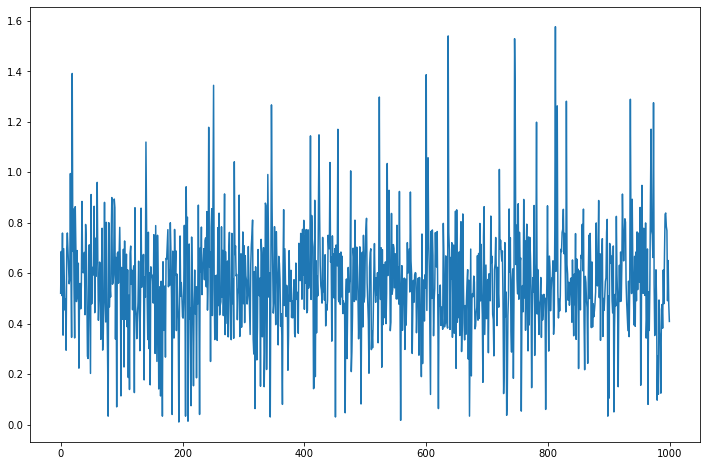

In [45]:
# distâncias e índices de k-vizinhos das saídas do modelo
distancias, indices = knn.kneighbors(df_pacientes)

# plot média de k-distâncias de cada observação 
# Os picos são potenciais anomalias no conjunto de dados
plt.figure(figsize=(12,8))
plt.plot(distancias.mean(axis = 1))

In [47]:
# Visualizando o gráfico percebe-se que o registro mais anômalo está acima de 1.95 no eixo y.
# Portanto, utilizaremos este valor como corte para filtrá-lo
# A maior anomalia é o registro 600 da base de dados
outlier_index = np.where(distancias.mean(axis = 1) > 1.56)
outlier_index

(array([812], dtype=int64),)

In [48]:
# Paciente mais anômalo
df_pacientes.iloc[outlier_index]

,NU_IDADE_N,SURTO_SG,NOSOCOMIAL,AVE_SUINO,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,...,ANTIVIRAL,HOSPITAL,UTI,RAIOX_RES,CLASSI_FIN,EVOLUCAO,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA
812,0.58,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,...,1.0,0.0,1.0,1.0,0.75,0.0,1.0,1.0,1.0,1.0


In [51]:
# Grau de estranheza
distancias[outlier_index].mean()

1.5767329490457598

### 4.2.2. Estado 

O estado que mais se difere dos demais em números de casos e internações.

In [185]:
# Importando os dados
df_estados = pd.read_csv('data/estados.csv')

# Transformando a coluna ID em índice
df_estados.set_index('ID', inplace=True)

df_estados

,SG_UF,SG_UF_INTE
ID,,
SP,318,320
MG,85,86
RJ,83,80
ES,13,13
RS,32,32
SC,17,17
PR,59,59
MT,23,23
MS,18,18


In [186]:
# Instanciando o modelo considerando os 3 vizinhos mais próximos
knn = NearestNeighbors(n_neighbors = 3)
knn.fit(df_estados)

NearestNeighbors(n_neighbors=3)

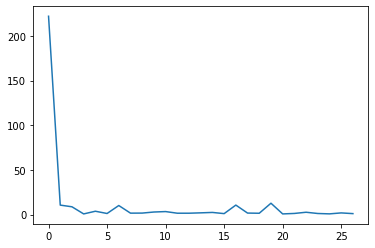

In [187]:
# distâncias e índices de k-vizinhos das saídas do modelo
distancias, indices = knn.kneighbors(df_estados)

# plot média de k-distâncias de cada observação 
# Os picos são potenciais anomalias no conjunto de dados
plt.plot(distancias.mean(axis = 1))

In [188]:
# Visualizando o gráfico percebe-se que o registro mais anômalo está acima de 200 no eixo y.
outlier_index = np.where(distancias.mean(axis = 1) > 200)
outlier_index

(array([0], dtype=int64),)

In [189]:
# O estado de São Paulo é a anomalia pois possui números absurdos de casos de SRAG e internações.
outlier = df_estados.iloc[outlier_index]
outlier

,SG_UF,SG_UF_INTE
ID,,
SP,318,320


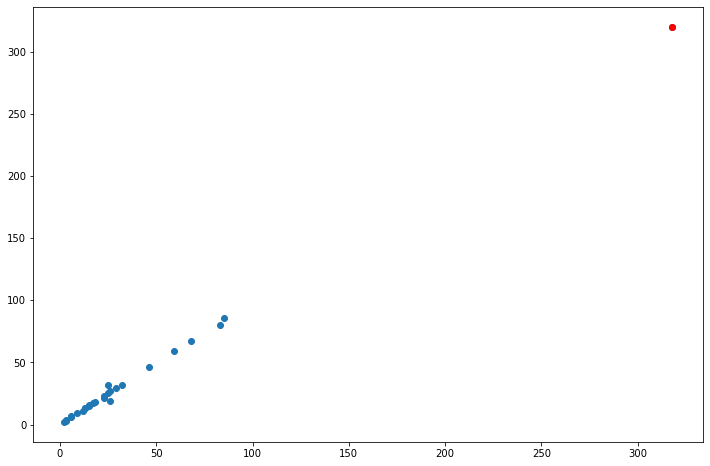

In [190]:
# Gráfico de dispersão para observar a anomalia
plt.figure(figsize=(12, 8))
plt.scatter(df_estados.SG_UF, df_estados.SG_UF_INTE)
plt.scatter(outlier.SG_UF, outlier.SG_UF_INTE, color='r')

In [191]:
# Grau de estranheza
distancias[0].mean()

222.03798416942004

### 4.2.3. Município de Residência dos Pacientes

In [223]:
# Importando os dados
df_mn_res = pd.read_csv('data/mn_residencia.csv', names=['Estado', 'ID_MN_RESI'], header=0)

# Transformando a coluna ID em índice
df_mn_res.set_index('Estado', inplace=True)

df_mn_res

,ID_MN_RESI
Estado,
SAO PAULO,127
RIO DE JANEIRO,38
RECIFE,33
FORTALEZA,22
SALVADOR,16
...,...
CAMPO MAIOR,1
GUAREI,1
CUSTODIA,1


In [224]:
# Instanciando o modelo considerando os 3 vizinhos mais próximos
knn = NearestNeighbors(n_neighbors = 3)
knn.fit(df_mn_res)

NearestNeighbors(n_neighbors=3)

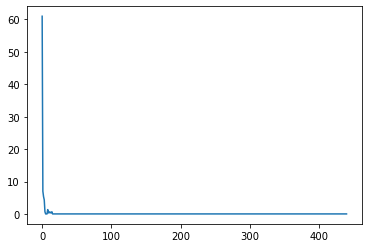

In [226]:
# distâncias e índices de k-vizinhos das saídas do modelo
distancias, indices = knn.kneighbors(df_mn_res)

# plot média de k-distâncias de cada observação 
plt.plot(distancias.mean(axis = 1))

In [227]:
# Visualizando o gráfico percebe-se que o registro mais anômalo está acima de 10 no eixo y.
outlier_index = np.where(distancias.mean(axis = 1) > 10)
outlier_index

(array([0], dtype=int64),)

In [228]:
# O município de São Paulo é a anomalia.
outlier = df_mn_res.iloc[outlier_index]
outlier

,ID_MN_RESI
Estado,
SAO PAULO,127


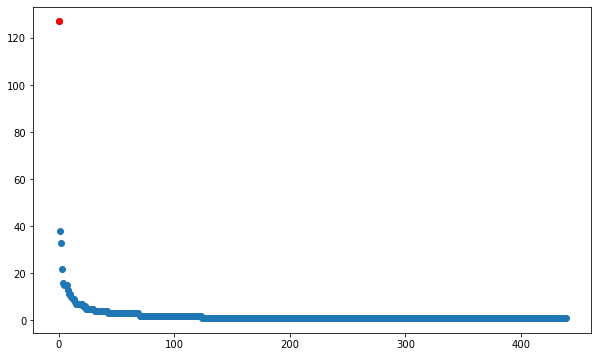

In [229]:
# Gráfico de dispersão para observar a anomalia.
plt.figure(figsize=(10,6))
plt.scatter(range(df_mn_res.shape[0]), df_mn_res['ID_MN_RESI'])
plt.scatter(outlier_index, outlier.ID_MN_RESI, color='r')

In [230]:
# Grau de estranheza
distancias[0].mean()

61.0

### 4.2.4. Município de Internação dos Pacientes

In [231]:
# Importando os dados
df_mn_inte = pd.read_csv('data/mn_internacao.csv', names=['Estado', 'ID_MN_INTE'], header=0)

# Transformando a coluna ID em índice
df_mn_inte.set_index('Estado', inplace=True)

df_mn_inte

,ID_MN_INTE
Estado,
SAO PAULO,221
RIO DE JANEIRO,39
RECIFE,36
BRASILIA,32
BELO HORIZONTE,26
...,...
SALTO DE PIRAPORA,1
FOZ DO IGUACU,1
ITAITUBA,1


In [232]:
# Instanciando o modelo considerando os 3 vizinhos mais próximos
knn = NearestNeighbors(n_neighbors = 3)
knn.fit(df_mn_inte)

NearestNeighbors(n_neighbors=3)

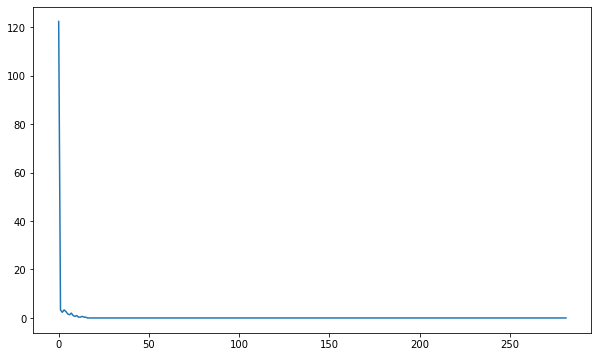

In [233]:
# distâncias e índices de k-vizinhos das saídas do modelo
distancias, indices = knn.kneighbors(df_mn_inte)

# plot média de k-distâncias de cada observação 
plt.figure(figsize=(10,6))
plt.plot(distancias.mean(axis = 1))

In [234]:
# Visualizando o gráfico percebe-se que o registro mais anômalo está acima de 10 no eixo y.
outlier_index = np.where(distancias.mean(axis = 1) > 10)
outlier_index

(array([0], dtype=int64),)

In [235]:
# O município de São Paulo é a anomalia.
outlier = df_mn_inte.iloc[outlier_index]
outlier

,ID_MN_INTE
Estado,
SAO PAULO,221


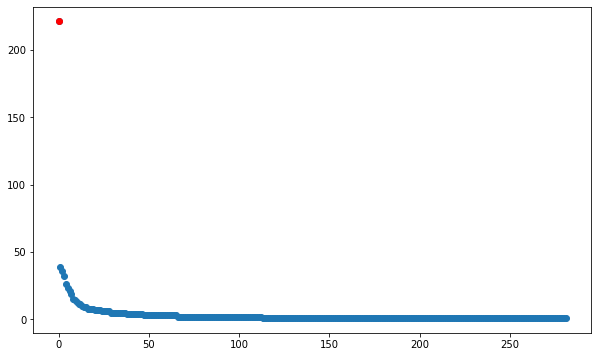

In [236]:
# Gráfico de dispersão para observar a anomalia.
plt.figure(figsize=(10,6))
plt.scatter(range(df_mn_inte.shape[0]), df_mn_inte['ID_MN_INTE'])
plt.scatter(outlier_index, outlier.ID_MN_INTE, color='r')

In [237]:
# Grau de estranheza
distancias[0].mean()

122.33333333333333

### 4.2.5. Semana Epidemiológica com mais ocorrências

In [239]:
# Importando os dados
df_sem_pri = pd.read_csv('data/semana_epidemiologica.csv', names=['Semana', 'Num_Casos'], header=0)

# Transformando a coluna ID em índice
df_sem_pri.set_index('Semana', inplace=True)

df_sem_pri

,Num_Casos
Semana,
29,63
31,51
28,50
23,49
20,48
32,48
33,47
21,45
24,45


In [240]:
# Instanciando o modelo considerando os 3 vizinhos mais próximos
knn = NearestNeighbors(n_neighbors = 3)
knn.fit(df_sem_pri)

NearestNeighbors(n_neighbors=3)

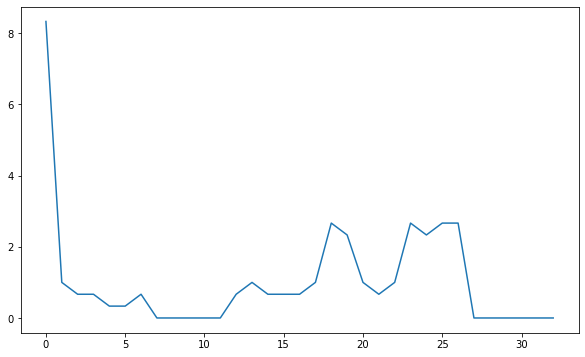

In [241]:
# distâncias e índices de k-vizinhos das saídas do modelo
distancias, indices = knn.kneighbors(df_sem_pri)

# plot média de k-distâncias de cada observação 
plt.figure(figsize=(10,6))
plt.plot(distancias.mean(axis = 1))

In [243]:
# Visualizando o gráfico percebe-se que o registro mais anômalo está acima de 4 no eixo y.
outlier_index = np.where(distancias.mean(axis = 1) > 4)
outlier = df_sem_pri.iloc[outlier_index]
outlier

,Num_Casos
Semana,
29,63


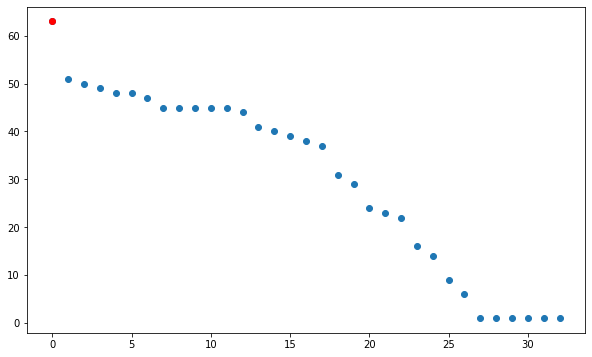

In [245]:
# Gráfico de dispersão para observar a anomalia.
plt.figure(figsize=(10,6))
plt.scatter(range(df_sem_pri.shape[0]), df_sem_pri['Num_Casos'])
plt.scatter(outlier_index, outlier.Num_Casos, color='r')

In [246]:
# Grau de estranheza
distancias[0].mean()

8.333333333333334

### 4.2.6. Diagnóstico Final

In [248]:
# Importando os dados
df_classi_fin = pd.read_csv('data/classificacao_final.csv', names=['Classificacao', 'Num_Casos'], header=0)

# Transformando a coluna ID em índice
df_classi_fin.set_index('Classificacao', inplace=True)

df_classi_fin

,Num_Casos
Classificacao,
5.0,648
4.0,342
1.0,5
2.0,4
3.0,1


In [249]:
# Instanciando o modelo considerando os 3 vizinhos mais próximos
knn = NearestNeighbors(n_neighbors = 3)
knn.fit(df_classi_fin)

NearestNeighbors(n_neighbors=3)

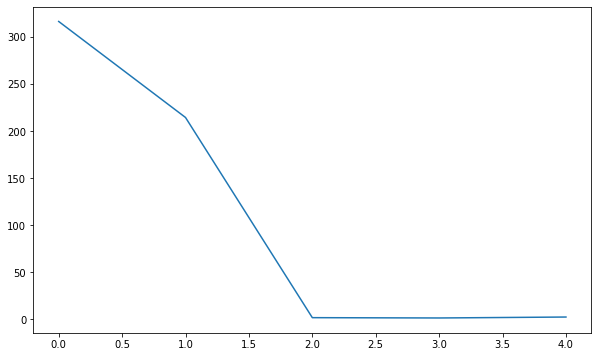

In [250]:
# distâncias e índices de k-vizinhos das saídas do modelo
distancias, indices = knn.kneighbors(df_classi_fin)

# plot média de k-distâncias de cada observação 
plt.figure(figsize=(10,6))
plt.plot(distancias.mean(axis = 1))

In [251]:
# Visualizando o gráfico percebe-se que o registro mais anômalo está acima de 10 no eixo y.
outlier_index = np.where(distancias.mean(axis = 1) > 250)
outlier = df_classi_fin.iloc[outlier_index]
outlier

,Num_Casos
Classificacao,
5.0,648


**Isto mostra que no ano de 2020, mais 60% dos casos de SRAG, desta amostragem, foram agravamentos causados pelo COVID-19.**

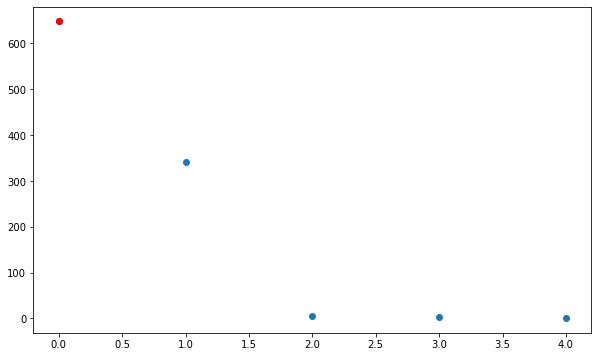

In [252]:
# Gráfico de dispersão para observar a anomalia.
plt.figure(figsize=(10,6))
plt.scatter(range(df_classi_fin.shape[0]), df_classi_fin['Num_Casos'])
plt.scatter(outlier_index, outlier.Num_Casos, color='r')

In [253]:
# Grau de estranheza
distancias[0].mean()

316.3333333333333

### 4.2.7. Sintomas

In [255]:
# Importando os dados
df_sintomas = pd.read_csv('data/sintomas.csv')

# Transformando a coluna ID em índice
df_sintomas.set_index('Sintoma', inplace=True)

df_sintomas

,Num_Ocorrencias
Sintoma,
Febre,715
Tosse,788
Garganta,182
Dispneia,783
Desc_Resp,700
Saturacao,705
Diarreia,116
Vomito,85
Dor_Abd,22


In [256]:
# Instanciando o modelo considerando os 3 vizinhos mais próximos
knn = NearestNeighbors(n_neighbors = 3)
knn.fit(df_sintomas)

NearestNeighbors(n_neighbors=3)

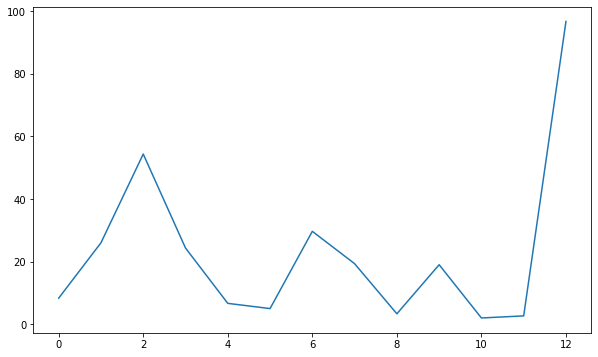

In [257]:
# distâncias e índices de k-vizinhos das saídas do modelo
distancias, indices = knn.kneighbors(df_sintomas)

# plot média de k-distâncias de cada observação 
plt.figure(figsize=(10,6))
plt.plot(distancias.mean(axis = 1))

In [258]:
# Visualizando o gráfico percebe-se que o registro mais anômalo está acima de 10 no eixo y.
outlier_index = np.where(distancias.mean(axis = 1) > 45)
outlier = df_sintomas.iloc[outlier_index]
outlier

,Num_Ocorrencias
Sintoma,
Garganta,182
Outro_Sin,294


**A anomalia encontrada é "Outros Sintomas", mas também é importante ressaltar que dos sintomas mais comuns, a dor de garganta é a mais anômala na amostragem.**

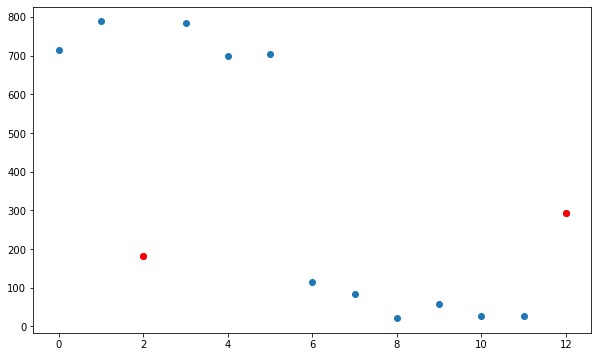

In [259]:
# Gráfico de dispersão para observar a anomalia.
plt.figure(figsize=(10,6))
plt.scatter(range(df_sintomas.shape[0]), df_sintomas['Num_Ocorrencias'])
plt.scatter(outlier_index, outlier.Num_Ocorrencias, color='r')

In [260]:
# Grau de estranheza
distancias[12].mean()

96.66666666666667

### 4.2.8. Fatores de Risco

In [267]:
# Importando os dados
df_fatores_risco = pd.read_csv('data/fator_risco.csv', names=['Fator', 'Num_Casos'], header=0)

# Transformando a coluna ID em índice
df_fatores_risco.set_index('Fator', inplace=True)

df_fatores_risco

,Num_Casos
Fator,
Puerpera,4
Cardiopati,807
Hematologi,15
Sind_Down,3
Hepatica,11
Asma,32
Diabetes,222
Neurologic,46
Pneumopati,60


In [268]:
# Instanciando o modelo considerando os 3 vizinhos mais próximos
knn = NearestNeighbors(n_neighbors = 3)
knn.fit(df_fatores_risco)

NearestNeighbors(n_neighbors=3)

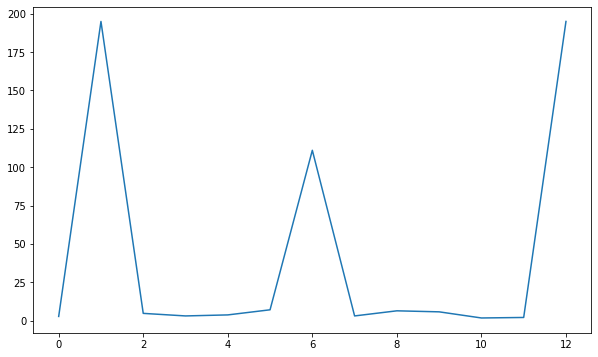

In [269]:
# distâncias e índices de k-vizinhos das saídas do modelo
distancias, indices = knn.kneighbors(df_fatores_risco)

# plot média de k-distâncias de cada observação 
plt.figure(figsize=(10,6))
plt.plot(distancias.mean(axis = 1))

In [272]:
# Visualizando o gráfico percebe-se que o registro mais anômalo está acima de 180 no eixo y.
outlier_index = np.where(distancias.mean(axis = 1) > 180)
outlier = df_fatores_risco.iloc[outlier_index]
outlier

,Num_Casos
Fator,
Cardiopati,807
Outro,807


**A Doença Cardiovascular Crônica é o fator de risco mais anômalo da amostragem.**

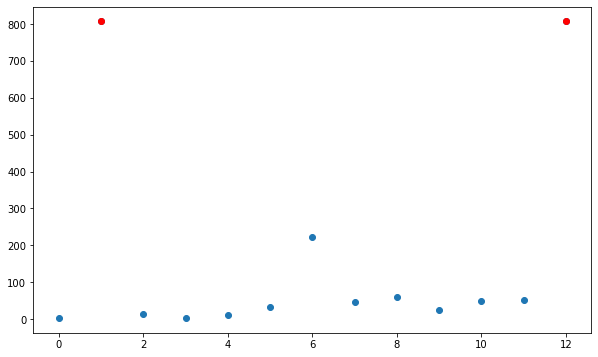

In [273]:
# Gráfico de dispersão para observar a anomalia.
plt.figure(figsize=(10,6))
plt.scatter(range(df_fatores_risco.shape[0]), df_fatores_risco['Num_Casos'])
plt.scatter(outlier_index, outlier.Num_Casos, color='r')

In [274]:
# Grau de estranheza
distancias[1].mean()

195.0

### 4.2.9. Idades dos Pacientes

In [278]:
# Importando os dados
df_idades = pd.read_csv('data/idades.csv')

In [279]:
# Instanciando o modelo considerando os 3 vizinhos mais próximos
knn = NearestNeighbors(n_neighbors = 3)
knn.fit(df_idades)

NearestNeighbors(n_neighbors=3)

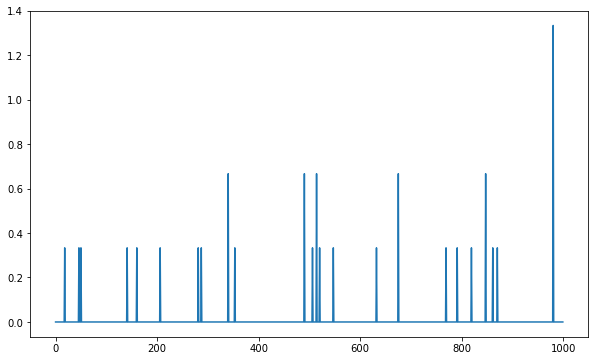

In [280]:
# distâncias e índices de k-vizinhos das saídas do modelo
distancias, indices = knn.kneighbors(df_idades)

# plot média de k-distâncias de cada observação 
plt.figure(figsize=(10,6))
plt.plot(distancias.mean(axis = 1))

In [281]:
# Visualizando o gráfico percebe-se que o registro mais anômalo está acima de 10 no eixo y.
outlier_index = np.where(distancias.mean(axis = 1) > 0.8)
outlier = df_idades.iloc[outlier_index]
outlier

,NU_IDADE_N
980,100


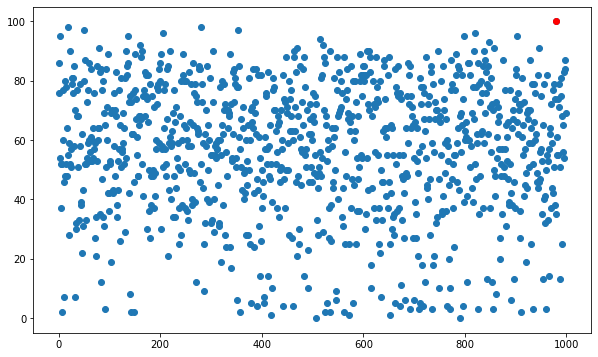

In [282]:
# Gráfico de dispersão para observar a anomalia.
plt.figure(figsize=(10,6))
plt.scatter(range(df_idades.shape[0]), df_idades['NU_IDADE_N'])
plt.scatter(outlier_index, outlier.NU_IDADE_N, color='r')

In [153]:
# Grau de estranheza
distancias[980].mean()

1.3333333333333333

### 4.2.10. Raça dos Pacientes

In [291]:
# Importando os dados 
df_racas = pd.read_csv('data/racas.csv', names=['Raca', 'Num_Pacientes'], header=0)

# Transformando a coluna ID em índice
df_racas.set_index('Raca', inplace=True)

df_racas

,Num_Pacientes
Raca,
4.0,598
1.0,335
2.0,52
3.0,11
5.0,4


In [292]:
# Instanciando o modelo considerando os 3 vizinhos mais próximos
knn = NearestNeighbors(n_neighbors = 3)
knn.fit(df_racas)

NearestNeighbors(n_neighbors=3)

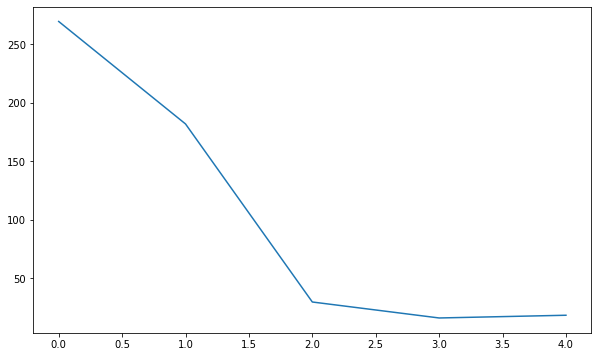

In [293]:
# distâncias e índices de k-vizinhos das saídas do modelo
distancias, indices = knn.kneighbors(df_racas)

# plot média de k-distâncias de cada observação 
plt.figure(figsize=(10,6))
plt.plot(distancias.mean(axis = 1))

In [294]:
# Visualizando o gráfico percebe-se que o registro mais anômalo está acima de 10 no eixo y.
outlier_index = np.where(distancias.mean(axis = 1) > 200)
outlier = df_racas.iloc[outlier_index]
outlier

,Num_Pacientes
Raca,
4.0,598


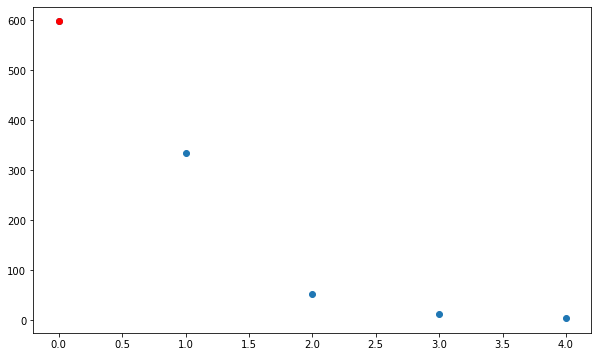

In [295]:
# Gráfico de dispersão para observar a anomalia.
plt.figure(figsize=(10,6))
plt.scatter(range(df_racas.shape[0]), df_racas['Num_Pacientes'])
plt.scatter(outlier_index, outlier.Num_Pacientes, color='r')

**A raça da grande maioria dos pacientes é parda, por isso ela é a anomalia.**

In [296]:
# Grau de estranheza
distancias[0].mean()

269.6666666666667